In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, MultipleLocator
from sympy import sin, cos, tan, sec, asin, atan2, sqrt, diff

In [3]:
c, om_0, om_p, N, l, om, brew, brew_ = sp.symbols(('c', 'omega_0', 'omega_p', 'N', 'lambda', 'omega', 'theta_b', 'theta_b^\''))

In [4]:
#c = 299792458*1e6*1e-15 # um / fs
#l = 0.8 # um
#om_0 = 2*np.pi*c/l # 1/fs
#N = 0.2 # relative plasma density
om_p = sp.sqrt(N)*om_0
om_0_eq = sp.Eq(om_0, 2*sp.pi*c/l)
om_p_eq = sp.Eq(om_p, sp.sqrt(N)*om_0)
display(om_0_eq, om_p_eq)
display(brew, brew_, om_0)

Eq(omega_0, 2*pi*c/lambda)

True

theta_b

theta_b^'

omega_0

In [24]:
n = sqrt(1 - om_p**2/om**2)
n = sp.Function('n')(om)
d_n = sp.simplify(diff(n, om, 1))
d2_n = sp.simplify(diff(n, om, 2))
d3_n = sp.simplify(diff(n, om, 3))
display(n, d_n, d2_n, sp.simplify(d2_n), d3_n)


n(omega)

Derivative(n(omega), omega)

Derivative(n(omega), (omega, 2))

Derivative(n(omega), (omega, 2))

Derivative(n(omega), (omega, 3))

In [23]:

D_N = sp.lambdify((N, om_0, om), d_n)
D2_N = sp.lambdify((N, om_0, om), d2_n)
D3_N = sp.lambdify((N, om_0, om), d3_n)

In [7]:
n0 = n.subs({om:om_0})
display(n0, om_0)
#brew = atan2(n0, 1)#.evalf(subs={om:om_0})
#brew_ = atan2(1, n0)#.evalf(subs={om:om_0})
display(brew, brew_)

n(omega_0)

omega_0

theta_b

theta_b^'

In [8]:
n_0 = sp.symbols('n_0')
p2, p1 = sp.symbols('varphi_2, varphi_1^\'')

phi1_ = sp.Function('varphi_1^\'')(n)
phi1_ = asin(sin(brew)/n)#.subs({sqrt(1.0-N):n_0, (1.0-N)**1.0 + 1: N})
#display(sp.simplify(asin(sin(brew)/n)))
#d_phi1_ = sp.simplify(-tan(phi1_)/n) #* d_n # == diff(phi1_, om, 1) wrt om

d_phi1_NICE = -tan(p1)/n
d_phi1_ = diff(phi1_, n, 1)

d2_phi1_ = sp.simplify(diff(d_phi1_, n, 1)) # wrt n
d2_phi1_NICE = d2_phi1_.subs({sqrt(1-sin(brew)**2/n**2) :   cos(p1), 
                              sqrt(n**2-sin(brew)**2)   : n*cos(p1)})

d3_phi1_ = sp.simplify(diff(d_phi1_, n, 2)) # wrt n
d3_phi1_NICE = d3_phi1_.subs({sqrt(1-sin(brew)**2/n**2):cos(p1), sqrt(n**2-sin(brew)**2):n*cos(p1)})
d3_phi1_NICE = d3_phi1_NICE.subs({(n-sin(brew))**2*(n+sin(brew))**2:(n**2-sin(brew)**2)**2, sqrt(n**2-sin(brew)**2):n*cos(p1)})

display(phi1_, d_phi1_NICE, d2_phi1_NICE, d3_phi1_NICE)


asin(sin(theta_b)/n(omega))

-tan(varphi_1^')/n(omega)

(2*n(omega)**2 - sin(theta_b)**2)*sin(theta_b)/(n(omega)**5*cos(varphi_1^')**3)

(-6*n(omega)**4 + 5*n(omega)**2*sin(theta_b)**2 - 2*sin(theta_b)**4)*sin(theta_b)/(n(omega)**8*cos(varphi_1^')**5)

In [9]:
phi2_ = 2*brew_ - phi1_


phi2 = sp.Function('varphi_2')(n)
phi2 = asin(sin(2*brew_)*sqrt(n**2-sin(brew)**2) - cos(2*brew_)*sin(brew))
display(phi2)

d_phi2 = sp.simplify(sp.diff(phi2, n, 1))
d_phi2_NICE = sp.simplify(d_phi2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                                       sqrt(n**2-sin(brew)**2)  :   n*cos(p1),
                                       sqrt(1-sin(p2)**2)       :   cos(p2)}))
display(d_phi2_NICE)

d2_phi2 = sp.simplify(sp.diff(phi2, n, 2)) # tan(phi2) * d_phi2**2 - tan(phi1_)**2 / n * d_phi2
d2_phi2_NICE = sp.simplify(d2_phi2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)    :   sin(p2),
                                         sqrt(n**2-sin(brew)**2)    :   n*cos(p1), 
                                         sqrt(1-sin(p2)**2)         :   cos(p2)}))
display(d2_phi2_NICE)

d3_phi2 = sp.diff(phi2, n, 3)
d3_phi2_NICE = sp.simplify(d3_phi2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)    :   sin(p2), 
                                         sqrt(n**2-sin(brew)**2)    :   n*cos(p1), 
                                         sqrt(1-sin(p2)**2)         :   cos(p2)}))
display(d3_phi2_NICE)

asin(sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))

sin(2*theta_b^')/(cos(varphi_1^')*cos(varphi_2))

(n(omega)*sin(2*theta_b^')*sin(varphi_2)*cos(varphi_1^') + sin(varphi_2)**2 + cos(varphi_1^')**2*cos(varphi_2)**2 - 1)*sin(2*theta_b^')/(n(omega)*cos(varphi_1^')**3*cos(varphi_2)**3)

(3*n(omega)**2*sin(2*theta_b^')**2*sin(varphi_2)**2*cos(varphi_1^')**2 + n(omega)**2*sin(2*theta_b^')**2*cos(varphi_1^')**2*cos(varphi_2)**2 + 3*n(omega)*sin(2*theta_b^')*sin(varphi_2)*cos(varphi_1^')**3*cos(varphi_2)**2 - 3*n(omega)*sin(2*theta_b^')*sin(varphi_2)*cos(varphi_1^')*cos(varphi_2)**2 - 3*cos(varphi_1^')**2*cos(varphi_2)**4 + 3*cos(varphi_2)**4)*sin(2*theta_b^')/(n(omega)**2*cos(varphi_1^')**5*cos(varphi_2)**5)

In [10]:
#om = np.linspace(om_0 * 0.9, om_0 * 1.1)
#n_0 = sqrt(1-N)
#brew = arctan2(n_0, 1)
#brew_ = arctan2(1, n_0)

tip1 = (400,300)
tip2 = (22000,500)
mirror = 32000

g = atan2(tip2[1] - tip1[1], tip2[0] - tip1[0]) - brew_ + brew
L = np.abs(cos(g))*sqrt((tip2[1] - tip1[1])**2 + (tip2[0] - tip1[0])**2) * c/om_0

L, g = sp.symbols('L, gamma')

M = (mirror - tip2[0])* c/om_0

a = cos(brew_ - g)
b = sin(brew_ - g)

display('brew', brew, 'brew_', brew_, 'gamma', g, 'L', L, 'M', M)

'brew'

theta_b

'brew_'

theta_b^'

'gamma'

gamma

'L'

L

'M'

10000*c/omega_0

In [11]:
a1 = L*a/cos(g) * sec(phi2) # f(omega)
a1_NICE = a1.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                   sqrt(1-sin(p2)**2)   :   cos(p2)})
display(a1_NICE)

d_a1 = sp.simplify(diff(a1, n, 1))
d_a1_NICE = sp.simplify(d_a1.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                       sqrt(1-sin(p2)**2)       :   cos(p2),
                       sqrt(n**2-sin(brew)**2)  :   n*cos(p1)}))
display(d_a1_NICE)

d2_a1 = diff(a1, n, 2)
d2_a1_NICE = sp.simplify(d2_a1.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                         sqrt(1-sin(p2)**2)       :   cos(p2),
                         sqrt(n**2-sin(brew)**2)  :   n*cos(p1),
                         sin(p2)**2 - 1           : -cos(p2)**2}))
display(d2_a1_NICE)

d3_a1 = diff(a1, n, 3)
d3_a1_NICE = sp.simplify(d3_a1.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                                     sqrt(n**2-sin(brew)**2)  :   n*cos(p1),
                                     sqrt(1-sin(p2)**2)       :   cos(p2)}))
display(d3_a1_NICE)

L*cos(gamma - theta_b^')/(cos(gamma)*cos(varphi_2))

L*sin(2*theta_b^')*sin(varphi_2)*cos(gamma - theta_b^')/(cos(gamma)*cos(varphi_1^')*cos(varphi_2)**3)

L*(4*n(omega)*sin(theta_b^')*sin(varphi_2)**2*cos(theta_b^')*cos(varphi_1^') + 2*n(omega)*sin(theta_b^')*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**3 - sin(varphi_1^')**2*sin(varphi_2))*sin(2*theta_b^')*cos(gamma - theta_b^')/(n(omega)*cos(gamma)*cos(varphi_1^')**3*cos(varphi_2)**5)

3*L*(5*n(omega)**2*sin(2*theta_b^')**2*sin(varphi_2)**3*cos(varphi_1^')**2 + 3*n(omega)**2*sin(2*theta_b^')**2*sin(varphi_2)*cos(varphi_1^')**2*cos(varphi_2)**2 + 3*n(omega)*sin(2*theta_b^')*sin(varphi_2)**2*cos(varphi_1^')**3*cos(varphi_2)**2 - 3*n(omega)*sin(2*theta_b^')*sin(varphi_2)**2*cos(varphi_1^')*cos(varphi_2)**2 + n(omega)*sin(2*theta_b^')*cos(varphi_1^')**3*cos(varphi_2)**4 - n(omega)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**4 - sin(varphi_2)*cos(varphi_1^')**2*cos(varphi_2)**4 + sin(varphi_2)*cos(varphi_2)**4)*sin(2*theta_b^')*cos(gamma - theta_b^')/(n(omega)**2*cos(gamma)*cos(varphi_1^')**5*cos(varphi_2)**7)

In [12]:
a2 = L/cos(g)*sin(2*brew_) * (b - a*tan(phi2)) * sec(phi1_)
a2_NICE = sp.simplify(a2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                   sqrt(1-sin(brew)**2/n**2)    :   cos(p1),
                   sqrt(1-sin(p2)**2)           :   cos(p2)}))
display(a2_NICE)

d_a2 = diff(a2, n, 1)
d_a2_NICE = sp.simplify(d_a2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                                   sqrt(1-sin(brew)**2/n**2)    :   cos(p1),
                                   sqrt(n**2-sin(brew)**2)      :   n*cos(p1),
                                   sqrt(1 - sin(p2)**2)         :   cos(p2)}))
display(d_a2_NICE)

d2_a2 = (diff(a2, n, 2))
d2_a2_NICE = sp.simplify(d2_a2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                                     sqrt(1 - sin(p2)**2)           :   cos(p2),
                                     sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                                     sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                                     sin(p2)**2-1                   :   -cos(p2)**2}))
display(d2_a2_NICE)

d3_a2 = diff(a2, n, 3)
d3_a2_NICE = sp.simplify(d3_a2.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                         sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                         sqrt(1 - sin(p2)**2)           :   cos(p2),
                         sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                         sin(p2)**2-1                   :   -cos(p2)**2}))
display(d3_a2_NICE)

-L*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)/(cos(gamma)*cos(varphi_1^')*cos(varphi_2))

L*(-n(omega)**3*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') + sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*sin(2*theta_b^')/(n(omega)**3*cos(gamma)*cos(varphi_1^')**3*cos(varphi_2)**3)

-L*(3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4 + (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - 2*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^'))*sin(2*theta_b^')/(n(omega)**6*cos(gamma)*cos(varphi_1^')**5*cos(varphi_2)**5)

-3*L*(3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**4*cos(gamma - theta_b^') - (4*n(omega)**4*cos(varphi_1^')**4 + 9*n(omega)**2*sin(theta_b)**2*cos(varphi_1^')**2 + 5*sin(theta_b)**4)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**6 - (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (16*(cos(theta_b^')**2 - 1)**2*n(omega)**2*cos(varphi_1^')**2*cos(varphi_2)**2 - 20*(cos(theta_b^')**2 - 1)**2*n(omega)**2*cos(varphi_1^')**2 - (cos(varphi_2)**2 - 1)**2*cos(varphi_1^')**2 + (cos(varphi_2)**2 - 1)**2 + 16*n(omega)**2*cos(theta_b^')**2*cos(varphi_1^')**2*cos(varphi_2)**2 - 20*n(omega)**2*cos(theta_b^')**2*cos(varphi_1^')**2 - 16*n(omega)**2*cos(varphi_1^')**2*cos(varphi_2)**2 + 20*n(omega)**2*cos(varphi_1^')*

In [13]:
a3 = M - sin(brew)*L/cos(g) * (b-a*tan(phi2)) * (cos(2*brew_) + sin(2*brew_)*tan(phi1_))
a3_NICE = sp.simplify(a3.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                   sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                   sqrt(1 - sin(p2)**2)           :   cos(p2),
                   sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                   sin(p2)**2-1                   :   -cos(p2)**2}))
display(a3_NICE)

d_a3 = sp.simplify(diff(a3, n, 1))
d_a3_NICE = sp.simplify(d_a3.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                       sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                       sqrt(1 - sin(p2)**2)           :   cos(p2),
                       sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                       sin(p2)**2-1                   :   -cos(p2)**2}))
display(d_a3_NICE)

d2_a3 = (sp.diff(a3, n, 2))
d2_a3_NICE = sp.simplify(d2_a3.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                       sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                       sqrt(1 - sin(p2)**2)           :   cos(p2),
                       sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                       sin(p2)**2-1                   :   -cos(p2)**2}))
display(d2_a3_NICE)

d3_a3 = (sp.diff(a3, n, 3))
d3_a3_NICE = sp.simplify(d3_a3.subs({sqrt(n**2-sin(brew)**2)*sin(2*brew_)-sin(brew)*cos(2*brew_)  :   sin(p2),
                       sqrt(1-sin(brew)**2/n**2)      :   cos(p1),
                       sqrt(1 - sin(p2)**2)           :   cos(p2),
                       sqrt(n**2-sin(brew)**2)        :   n*cos(p1),
                       sin(p2)**2-1                   :   -cos(p2)**2}))
display(d3_a3_NICE)

L*sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(2*theta_b^')/(cos(gamma)*cos(varphi_2)) + L*sin(theta_b)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)/(n(omega)*cos(gamma)*cos(varphi_1^')*cos(varphi_2)) + 10000*c/omega_0

L*((n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*n(omega)*cos(varphi_1^')*cos(gamma - theta_b^') - sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*sin(theta_b)*sin(2*theta_b^')/(n(omega)**2*cos(gamma)*cos(varphi_1^')**3*cos(varphi_2)**3)

L*(-2*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*cos(varphi_1^')*cos(gamma - theta_b^') + (2*n(omega)**4*cos(varphi_1^')**4 + 5*n(omega)**2*sin(theta_b)**2*cos(varphi_1^')**2 + 3*sin(theta_b)**4)*sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4)*sin(theta_b)*sin(2*theta_b^')/(n(omega)**7*cos(gamma)*cos(varphi_1^')**5*cos(varphi_2)**5)

-3*L*((n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') - (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(16*(cos(theta_b^')**2 - 1)**2*n(omega)**2*cos(varphi_1^')**2*cos(varphi_2)**2 - 20*(cos(theta_b^')**2 - 1)**2*n(omega)**2*cos(varphi_1^')**2 - (cos(varphi_2)**2 - 1)**2*cos(varphi_1^')**2 + (cos(varphi_2)**2 - 1)**2 + 16*n(omega)**2*cos(theta_b^')**2*cos(varphi_1^')**2*cos(varphi_2)**2 - 20*n(omega)**2*cos(theta_b^')**2*cos(varphi_1^')**2 - 16*n(omega)**2*cos(varphi_1^')**2*cos(varphi_2)**2 + 20*n(omega)**2*cos(varphi_1^')**2 + 6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^')**3*cos(varphi_2)**2 - 6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^')*cos(varphi_2)**2 - 2*cos(varphi_1^')**

In [14]:
P = 2*(a1 + n*a2 + a3)
P_NICE = 2*(a1_NICE + n*a2_NICE + a3_NICE)
display(P_NICE)

d_P = sp.diff(P, om, 1)
d_P_NICE = sp.simplify(2*((d_a1_NICE + a2_NICE + n*d_a2_NICE + d_a3_NICE) * d_n))
display(d_P_NICE)

d2_P = sp.diff(P, om, 2)
d2_P_NICE = sp.simplify(2*((d2_a1_NICE+ 2*d_a2_NICE + n*d2_a2_NICE + d2_a3_NICE) * d_n**2 + (d_a1_NICE + a2_NICE + n*d_a2_NICE + d_a3_NICE) * d2_n))
display(d2_P_NICE)

d3_P = sp.diff(P, om, 3)
d3_P_NICE = sp.simplify(2*((d3_a1_NICE + 3*d2_a2_NICE + n*d3_a2_NICE + d3_a3_NICE)*d_n**3 + 3*(d2_a1_NICE + 2*d_a2_NICE + n*d2_a2_NICE + d2_a3_NICE)*d_n*d2_n + (d_a1_NICE + a2_NICE + n*d_a2_NICE + d_a3_NICE)*d3_n))
display(d3_P_NICE)

-2*L*n(omega)*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)/(cos(gamma)*cos(varphi_1^')*cos(varphi_2)) + 2*L*sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(2*theta_b^')/(cos(gamma)*cos(varphi_2)) + 2*L*cos(gamma - theta_b^')/(cos(gamma)*cos(varphi_2)) + 2*L*sin(theta_b)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)/(n(omega)*cos(gamma)*cos(varphi_1^')*cos(varphi_2)) + 20000*c/omega_0

2*L*(-n(omega)**2*sin(2*theta_b^')*cos(gamma - theta_b^') + n(omega)*sin(theta_b)*cos(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') + n(omega)*sin(varphi_2)*cos(varphi_1^')*cos(gamma - theta_b^') - n(omega)*sin(gamma - theta_b^' + varphi_2)*cos(varphi_1^')*cos(varphi_2)**2 + sin(theta_b)**2*sin(2*theta_b^')*cos(gamma - theta_b^'))*sin(2*theta_b^')*Derivative(n(omega), omega)/(n(omega)*cos(gamma)*cos(varphi_1^')**2*cos(varphi_2)**3)

2*L*((-2*(n(omega)**3*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*n(omega)**4*cos(varphi_1^')**2*cos(varphi_2)**2 - (3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4 + (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - 2*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^'))*n(omega)**2 + (-2*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')*

2*L*(-3*(2*(n(omega)**3*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*n(omega)**4*cos(varphi_1^')**2*cos(varphi_2)**2 + (3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4 + (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - 2*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^'))*n(omega)**2 - (-2*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^'

In [15]:
psi = -1/c*om*P
psi_NICE = sp.simplify(-1/c*om*P_NICE)
display(psi_NICE)

d_psi = sp.diff(psi, om, 1)
d_psi_NICE = sp.simplify(-1/c * (P_NICE + om*d_P_NICE))
display(d_psi_NICE)

d2_psi = sp.diff(psi, om, 2)
d2_psi_NICE = sp.simplify(-1/c * (2*d_P_NICE + om*d2_P_NICE))
display(d2_psi_NICE)

d3_psi = sp.diff(psi, om, 3)
d3_psi_NICE = sp.simplify(-1/c * (3*d2_P_NICE + om*d3_P_NICE))
display(d3_psi_NICE)

-2*omega*(L*omega_0*(sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(2*theta_b^') + cos(gamma - theta_b^'))*n(omega)*cos(varphi_1^') - L*omega_0*n(omega)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2) + L*omega_0*sin(theta_b)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2) + 10000*c*n(omega)*cos(gamma)*cos(varphi_1^')*cos(varphi_2))/(c*omega_0*n(omega)*cos(gamma)*cos(varphi_1^')*cos(varphi_2))

2*(-L*omega*omega_0*(-n(omega)**2*sin(2*theta_b^')*cos(gamma - theta_b^') + n(omega)*sin(theta_b)*cos(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') + n(omega)*sin(varphi_2)*cos(varphi_1^')*cos(gamma - theta_b^') - n(omega)*sin(gamma - theta_b^' + varphi_2)*cos(varphi_1^')*cos(varphi_2)**2 + sin(theta_b)**2*sin(2*theta_b^')*cos(gamma - theta_b^'))*sin(2*theta_b^')*Derivative(n(omega), omega) - L*omega_0*(sin(theta_b)*sin(gamma - theta_b^' + varphi_2)*cos(2*theta_b^') + cos(gamma - theta_b^'))*n(omega)*cos(varphi_1^')**2*cos(varphi_2)**2 + L*omega_0*n(omega)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)*cos(varphi_1^')*cos(varphi_2)**2 - L*omega_0*sin(theta_b)**2*sin(2*theta_b^')*sin(gamma - theta_b^' + varphi_2)*cos(varphi_1^')*cos(varphi_2)**2 - 10000*c*n(omega)*cos(gamma)*cos(varphi_1^')**2*cos(varphi_2)**3)/(c*omega_0*n(omega)*cos(gamma)*cos(varphi_1^')**2*cos(varphi_2)**3)

L*(omega*((4*(n(omega)**3*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*n(omega)**4*cos(varphi_1^')**2*cos(varphi_2)**2 + 2*(3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4 + (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - 2*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^'))*n(omega)**2 - 2*(-2*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varp

L*(omega*(3*(4*(n(omega)**3*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**2)*n(omega)**4*cos(varphi_1^')**2*cos(varphi_2)**2 + 2*(3*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*sin(theta_b)**2*sin(gamma - theta_b^' + varphi_2)*cos(varphi_2)**4 + (6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(varphi_1^')**2)*n(omega)**5*sin(2*theta_b^')*cos(varphi_1^')*cos(gamma - theta_b^') - 2*n(omega)**3*sin(theta_b)**2*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^'))*n(omega)**2 - 2*(-2*(n(omega)**2*cos(varphi_1^')**2 + sin(theta_b)**2)*n(omega)**3*sin(theta_b)*sin(2*theta_b^')*cos(varphi_1^')*cos(varphi_2)**2*cos(gamma - theta_b^') + (n(omega)*cos(2*theta_b^')*cos(varphi_1^') + sin(theta_b)*sin(2*theta_b^'))*(6*n(omega)*sin(theta_b^')*sin(varphi_2)*cos(theta_b^')*cos(varphi_1^') + sin(varphi_1^')**2*sin(varphi_2)**2 - sin(va

In [16]:
display(d2_psi)

2*L*(-omega*((cos(2*theta_b^') + sin(theta_b)*sin(2*theta_b^')/(sqrt(1 - sin(theta_b)**2/n(omega)**2)*n(omega)))*(3*(sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**3*n(omega)**2*sin(2*theta_b^')*Derivative(n(omega), omega)**2/(((sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**2 - 1)**2*(n(omega)**2 - sin(theta_b)**2)) - (sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**2*n(omega)*Derivative(n(omega), (omega, 2))/(((sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**2 - 1)*sqrt(n(omega)**2 - sin(theta_b)**2)) - (sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**2*Derivative(n(omega), omega)**2/(((sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2*theta_b^'))**2 - 1)*sqrt(n(omega)**2 - sin(theta_b)**2)) + (sqrt(n(omega)**2 - sin(theta_b)**2)*sin(2*theta_b^') - sin(theta_b)*cos(2

In [86]:
import scipy
test1 = sp.lambdify((L, g, p1, p2, om, brew, brew_, c, n, d_n, d2_n, d3_n), d3_psi_NICE/6)
test3 = sp.lambdify((L, g, p1, p2, om, brew, brew_, c, n, d_n, d2_n, d3_n), d2_psi_NICE/2)
test4 = sp.lambdify((L, g, om, brew, brew_, c, n, d_n, d2_n, d3_n), d2_psi/2)
test5 = sp.lambdify((brew, brew_, n), phi2)
from matplotlib.cm import ScalarMappable

def func(rho, l1, l2, g1, g2, num):
    OM_0 = 2*np.pi*299792458*1e6*1e-15/0.8
    OM = np.linspace(0.9*OM_0, 1.1*OM_0,num)
    m = np.sqrt(1 - rho*OM_0**2/OM**2) # refractive index
    m1 = D_N(rho, OM_0, OM)
    m2 = D2_N(rho, OM_0, OM)
    m3 = D3_N(rho, OM_0, OM)
    b = np.arctan2(np.sqrt(1-rho),1)
    b_ = np.arctan2(1, np.sqrt(1-rho))
    P2 = np.arcsin(np.sin(2*b_)*np.sqrt(m**2-np.sin(b)**2) - np.cos(2*b_)*np.sin(b))
    P1_ = np.arcsin(np.sin(b)/m)

    g_max = b_ - test5(b, b_, np.sqrt(1 - rho/1.15**2))
    

    Lx, Ly = np.meshgrid(np.linspace(l1,l2,num), np.linspace(g1, g2,num))


    g = np.arctan2(Ly, Lx) - b_ + b
    L = Lx *  299792458*1e6*1e-15/OM_0

    l, G = np.meshgrid(np.linspace(l1,l2,num), np.linspace(np.deg2rad(g1), np.deg2rad(g2),num))
    test2 = test1(L, g, P1_, P2, OM_0, b, b_, 299792458*1e6*1e-15, m, m1, m2, m3)
    
    Ly_max = L * np.tan(g_max)

    #l,G = np.meshgrid(np.logspace(l1,l2,num), np.linspace(g1, g2,num))
    #print(l[0][::10])
    fig, ax = plt.subplots(dpi=300)
    #cf = ax.contourf(l, np.rad2deg(G), test2, 1000, cmap='seismic', vmin=-100, vmax=100)
    cf = ax.contourf(Lx, Ly, test2, 1000, cmap='seismic', vmin=-100, vmax=100)
    ax.plot(Lx, Ly_max, c='g')
    fig.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))
    #for i in l[0][::100]:
        #ax.axvline(i, alpha=0.2, c='g')

def func2(rho, l1, l2, g1, g2, num):
    OM_0 = 2*np.pi*299792458*1e6*1e-15/0.8
    OM = np.linspace(0.9*OM_0, 1.1*OM_0,num)
    m = np.sqrt(1 - rho*OM_0**2/OM**2) # refractive index
    m1 = D_N(rho, OM_0, OM)
    m2 = D2_N(rho, OM_0, OM)
    m3 = D3_N(rho, OM_0, OM)
    b = np.arctan2(np.sqrt(1-rho),1)
    b_ = np.arctan2(1, np.sqrt(1-rho))
    P2 = np.arcsin(np.sin(2*b_)*np.sqrt(m**2-np.sin(b)**2) - np.cos(2*b_)*np.sin(b))
    P1_ = np.arcsin(np.sin(b)/m)

    Lx, Ly = np.meshgrid(np.linspace(l1,l2,num), np.linspace(g1, g2,num))

    g = np.arctan2(Ly, Lx) - b_ + b
    L = np.abs(np.cos(g))*np.sqrt((Ly)**2 + (Lx)**2) *  299792458*1e6*1e-15/OM_0

    #l, G = np.meshgrid(np.logspace(l1,l2,num), np.linspace(np.deg2rad(g1), np.deg2rad(g2),num))
    test2 = test3(L, g, P1_, P2, OM_0, b, b_, 299792458*1e6*1e-15, m, m1, m2, m3)
    #l,G = np.meshgrid(np.logspace(l1,l2,num), np.linspace(g1, g2,num))
    #print(l[0][::10])
    fig, ax = plt.subplots(dpi=300)
    cf = ax.contourf(Lx, Ly, test2, 1000, cmap='seismic', vmin=-10000, vmax=10000)
    fig.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))
    #for i in l[0][::100]:
        #ax.axvline(i, alpha=0.2, c='g')

def func3(rho, l1, l2, g1, g2, num):
    OM_0 = 2*np.pi*299792458*1e6*1e-15/0.8
    OM = np.linspace(0.9*OM_0, 1.1*OM_0,num)
    m = np.sqrt(1 - rho*OM_0**2/OM**2) # refractive index
    m1 = D_N(rho, OM_0, OM)
    m2 = D2_N(rho, OM_0, OM)
    m3 = D3_N(rho, OM_0, OM)
    b = np.arctan2(np.sqrt(1-rho),1)
    b_ = np.arctan2(1, np.sqrt(1-rho))
    P2 = np.arcsin(np.sin(2*b_)*np.sqrt(m**2-np.sin(b)**2) - np.cos(2*b_)*np.sin(b))
    P1_ = np.arcsin(np.sin(b)/m)

    g_max = b_ - test5(b, b_, np.sqrt(1 - rho/1.15**2))
    print(np.rad2deg(g_max))

    Lx, Ly = np.meshgrid(np.linspace(l1,l2,num), np.linspace(g1, g2,num))


    g = np.arctan2(Ly, Lx) - b_ + b
    L = Lx *  299792458*1e6*1e-15/OM_0

    l, G = np.meshgrid(np.linspace(l1,l2,num), np.linspace(np.deg2rad(g1), np.deg2rad(g2),num))
    test2 = test4(L, g, OM_0, b, b_, 299792458*1e6*1e-15, m, m1, m2, m3)
    
    Ly_max = L * np.tan(g_max)
    #print(Ly_max[0])
    
    #print(test2[200,:])
    #print(test2[:,200])
    arr = []
    for i in range(len(Lx[0])):
        #print(np.nonzero(np.abs(test2[:,i]- 1000) < 5)[0], end=' ')
        if np.nonzero(np.abs(test2[:,i]- 1000) < 5)[0]:
            arr.append((Lx[0,i], Ly[:, i]))
    print(arr)
    
    #l,G = np.meshgrid(np.logspace(l1,l2,num), np.linspace(g1, g2,num))
    #print(l[0][::10])
    fig, ax = plt.subplots(dpi=300)
    #cf = ax.contourf(l, np.rad2deg(G), test2, 1000, cmap='seismic', vmin=-100, vmax=100)
    cf = ax.contourf(Lx, Ly, test2, 1000, cmap='seismic', vmin=-50000, vmax=50000)
    ax.plot(Lx[0], Ly_max[0], c='g')
    fig.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))
    #for i in l[0][::100]:
        #ax.axvline(i, alpha=0.2, c='g')

5.255518764684799


/var/folders/0q/92tl0cqd1qjfvklm8_p_x7wr0000gn/T/ipykernel_51230/1835649377.py:103: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.nonzero(np.abs(test2[:,i]- 1000) < 5)[0]:


[(6015.885885885886, array([1.00000000e+01, 5.10490490e+02, 1.01098098e+03, 1.51147147e+03,
       2.01196196e+03, 2.51245245e+03, 3.01294294e+03, 3.51343343e+03,
       4.01392392e+03, 4.51441441e+03, 5.01490490e+03, 5.51539540e+03,
       6.01588589e+03, 6.51637638e+03, 7.01686687e+03, 7.51735736e+03,
       8.01784785e+03, 8.51833834e+03, 9.01882883e+03, 9.51931932e+03,
       1.00198098e+04, 1.05203003e+04, 1.10207908e+04, 1.15212813e+04,
       1.20217718e+04, 1.25222623e+04, 1.30227528e+04, 1.35232432e+04,
       1.40237337e+04, 1.45242242e+04, 1.50247147e+04, 1.55252052e+04,
       1.60256957e+04, 1.65261862e+04, 1.70266767e+04, 1.75271672e+04,
       1.80276577e+04, 1.85281481e+04, 1.90286386e+04, 1.95291291e+04,
       2.00296196e+04, 2.05301101e+04, 2.10306006e+04, 2.15310911e+04,
       2.20315816e+04, 2.25320721e+04, 2.30325626e+04, 2.35330531e+04,
       2.40335435e+04, 2.45340340e+04, 2.50345245e+04, 2.55350150e+04,
       2.60355055e+04, 2.65359960e+04, 2.70364865e+04, 2

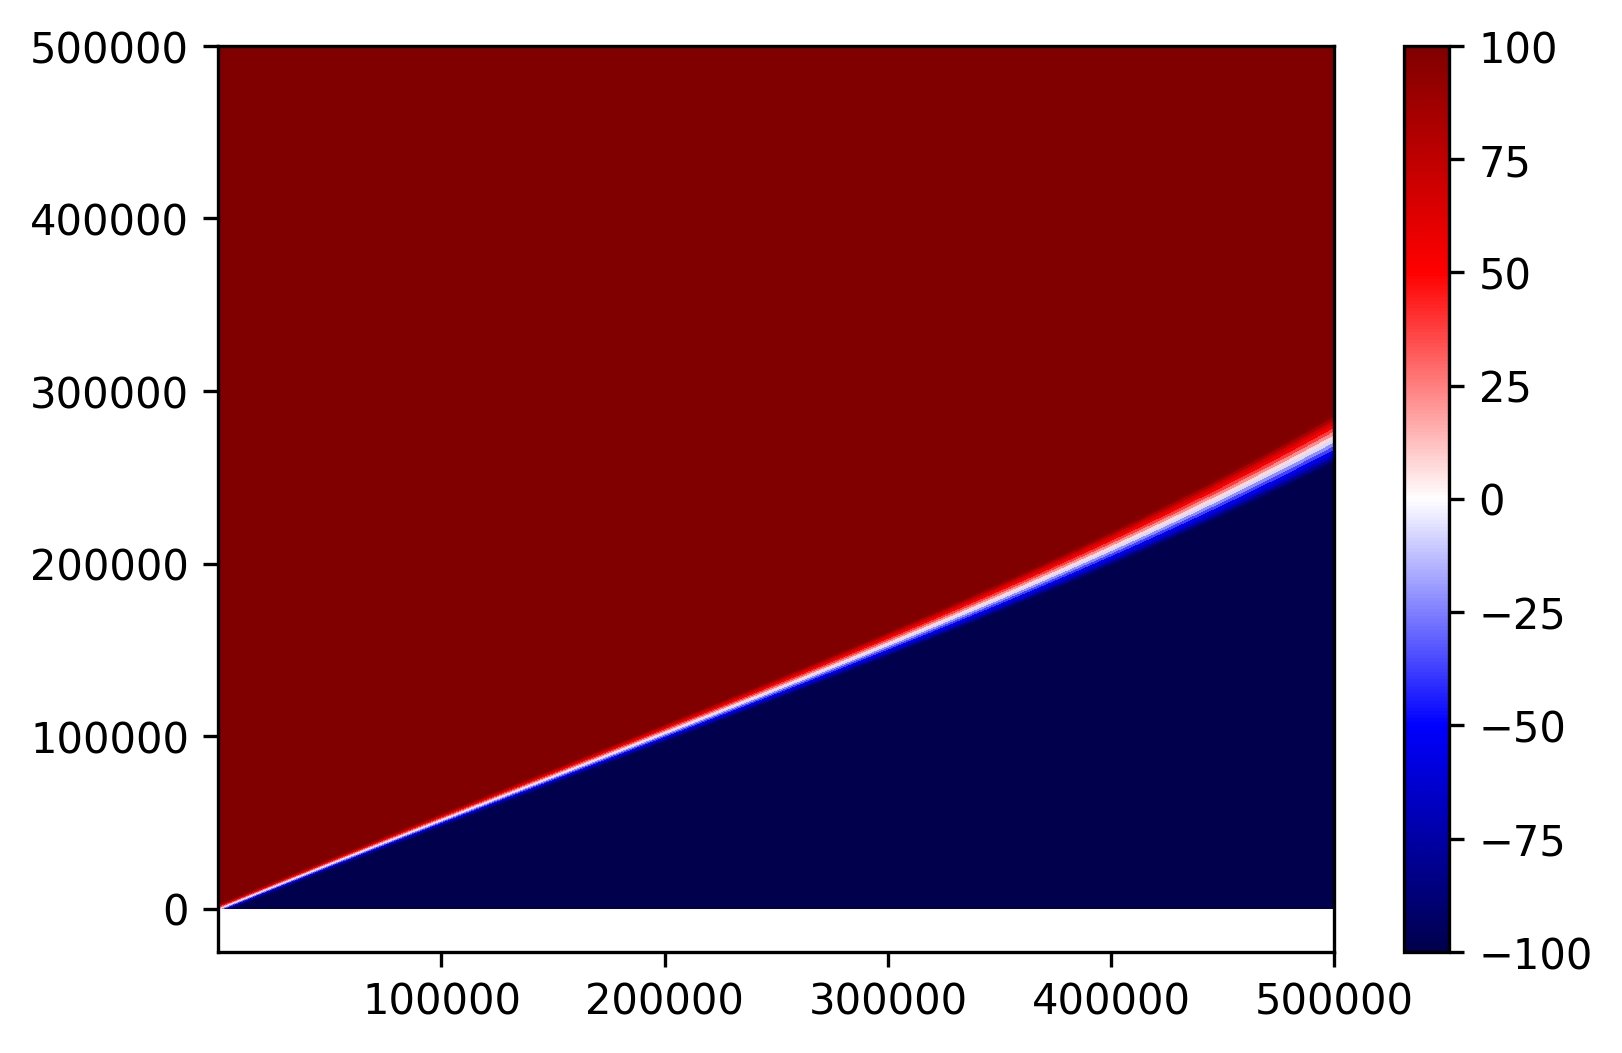

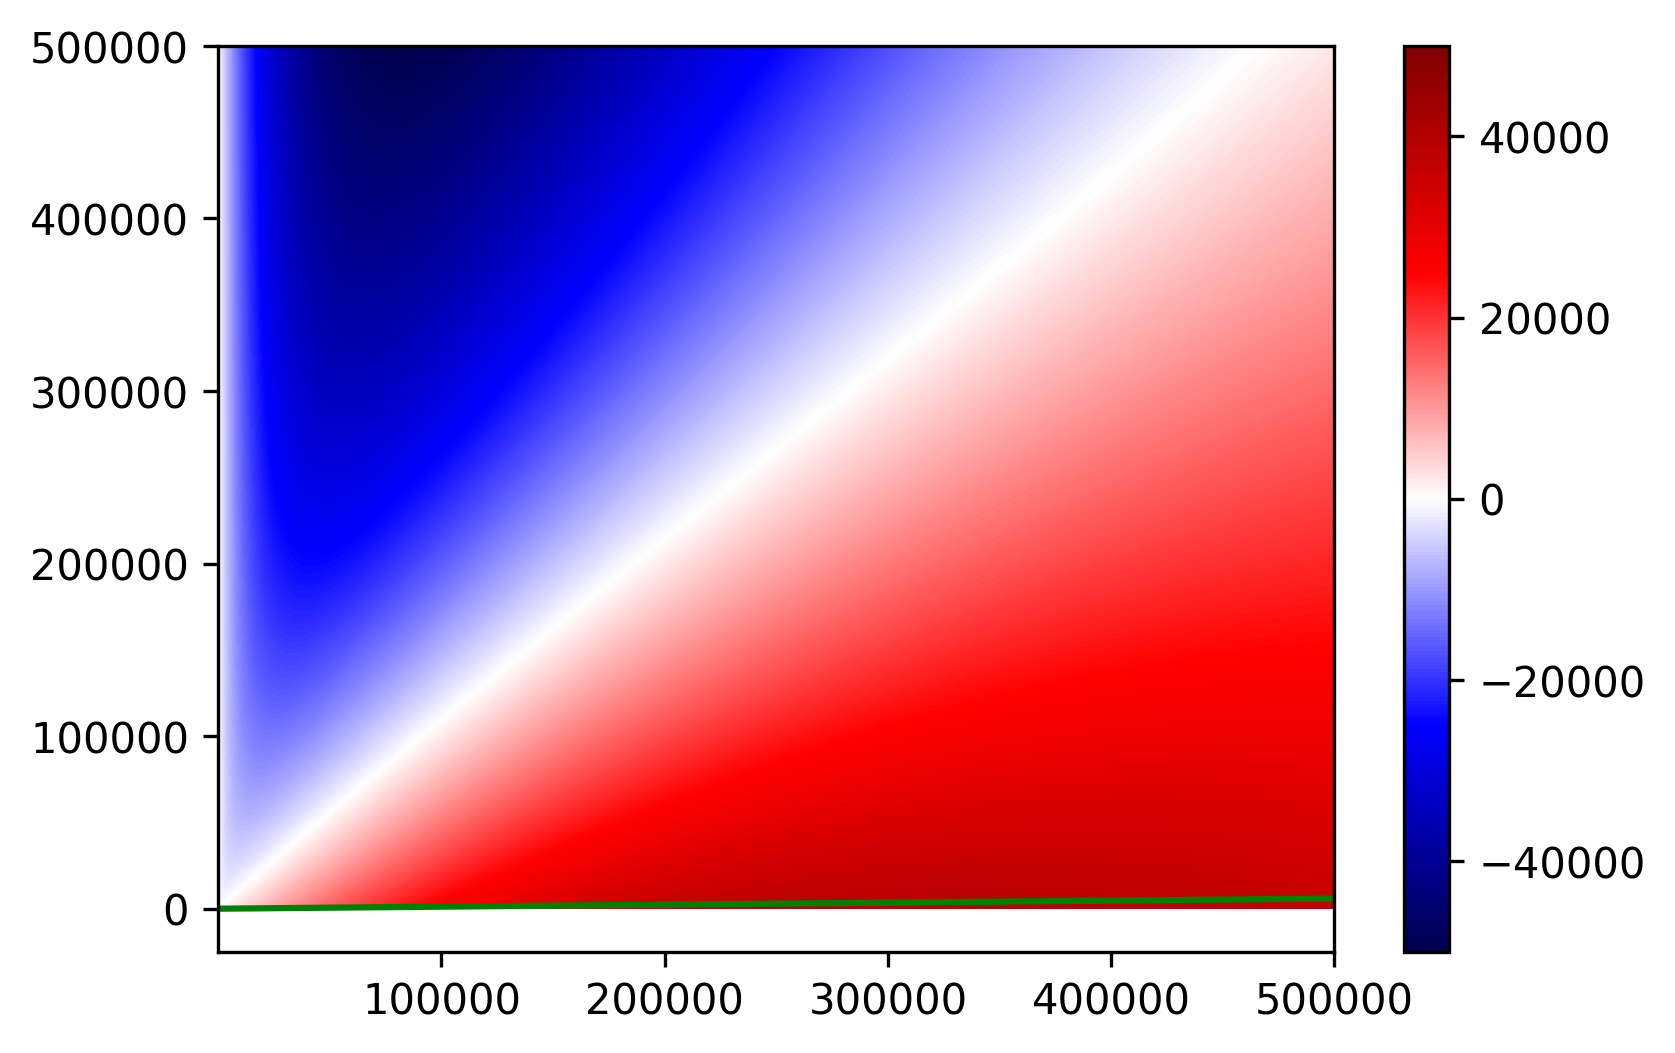

In [87]:
func(0.1, 1e1, 5e5, 1e1, 5e5, 500)
func3(0.3, 1e1, 5e5, 1e1, 5e5, 1000)

In [ ]:
fig, ax = plt.subplots(2,2, dpi=200, figsize=(8,8), sharex=True, constrained_layout=True)
ax[0,0].scatter(om, psi(om), s=5)

x = np.linspace(2, 3)
ax[0,0].plot(x, psi_taylor(om_0, x), c='r')
ax[0,0].set(xlabel=r'$\omega$ [1/fs]', ylabel=r'phase delay $\Psi(\omega)$')

ax[0,1].scatter(om, psi(om) - psi(om_0) - d_psi(om_0)*(om-om_0), s=5)
ax[0,1].plot(x, psi_taylor2(om_0, x), c='r', label=r'$\Psi(\omega)=%.1f(\omega-\omega_0)^2 + %.1f(\omega-\omega_0)^3$' % ((1./2.)*d2_psi(om_0), (1./6.)*d3_psi(om_0)))
ax[0,1].set(xlabel=r'$\omega$ [1/fs]', ylabel=r'phase delay (- linear)')
ax[0,1].legend()
ax[0,1].axhline(0, c='grey')
ax[0,1].axvline(om_0, c='grey')

ax[1,0].scatter(om, P(om) - P(om_0), s=1)
ax[1,0].set(xlabel=r'$\omega$ [1/fs]', ylabel=r'$\Delta$ optical path length $P(\omega)$')

print('L', L, 'gamma', np.rad2deg(g), 'M', M)
print('psi(om_0)', psi(om_0), '\nd_psi(om_0)', d_psi(om_0), '\nd2_psi(om_0)', d2_psi(om_0), '\nd3_psi(om_0)', d3_psi(om_0))

In [ ]:
fig, ax = plt.subplots(dpi=100)
L1 = 2000000
L2 = 250
g1 = np.deg2rad(0.3)
g2 = np.deg2rad(30)
ax.plot(om, om*d3_psi(om,L1,g1)/d2_psi(om,L1,g1), label='L='+str(L1)+' g='+str(g1))

ax.plot(om, om*d3_psi(om,L2,g2)/d2_psi(om,L2,g2), label='L='+str(L2)+' g='+str(g2))
ax.set(title=r'$\omega\frac{d^3\psi}{d\omega^3} / \frac{d^2\psi}{d\omega^2}$',
        xlabel=r'$\omega$ [1/fs]')
ax.legend()